In [96]:
# Code derived from http://saitcelebi.com/tut/output/part1.html#applying_gradient_descent
# @author Tom Bohbot
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [97]:
# Given helper methods, global variables, and lambdas:
LEARNING_RATE = 2.0
NUM_EPOCHS = 140

sigmoid = lambda x: 1/(1+np.exp(-x))

def get_loss(y, a):
  return -1 * (y * np.log(a) + (1-y) * np.log(1-a))

def get_loss_numerically_stable(y, z):
   return -1 * (y * -1 * np.log(1 + np.exp(-z)) + (1-y) * (-z - np.log(1 + np.exp(-z))))

In [98]:
# Given Gradient Descent Method
def grad_descent(dataset):
  X = dataset[0]
  y = dataset[1]
  # Rest of code is original
  w_cache = []
  b_cache = []
  l_cache = []

  # some nice initial value, so that the plot looks nice.
  w = np.array([-10.0, 150.0])
  b = 0.0

  for i in range(NUM_EPOCHS):
    dw = np.zeros(w.shape)
    db = 0.0
    loss = 0.0

    for j in range(X.shape[0]):
      x_j = X[j,:]
      y_j = y[j]

      z_j = w.dot(x_j) + b
      a_j = sigmoid(z_j)

      loss_j = get_loss_numerically_stable(y_j, z_j)

      dw_j = x_j * (a_j-y_j)
      db_j = a_j - y_j

      dw += dw_j
      db += db_j
      loss += loss_j

    # I altered the "17" issue through finding real size of data!
    datasize = len(y)
    dw = (1.0/datasize) * dw
    db = (1.0/datasize) * db
    loss = (1.0/datasize) * loss

    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db

    w_cache.append(w.copy())
    b_cache.append(b)
    l_cache.append(loss)

  plt.grid()
  plt.title('Loss', size=18)
  plt.xlabel('Number of iterations', size=15)
  plt.ylabel('Loss', size=15)
  plt.plot(l_cache)
  plt.show() #added this line of code

In [99]:
# Get the Iris Data Set:
def iris_dataset():
  iris = datasets.load_iris()
  X = np.array(iris.data[:,:2] )
  y = np.array(iris.target)
  for i in range (len(y)):
    if y[i] != 0:
      y[i] = 1
    else:
      y[i] = 0
  return [X,y]

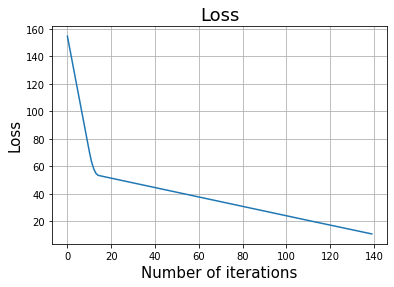

In [100]:
# Plot the iris data set:
grad_descent(iris_dataset() )